In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)


2.0.0-alpha0


In [2]:
imdb = keras.datasets.imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 3s 0us/step


In [5]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


Let's take a moment to understand the format of the data. The dataset comes preprcessed: each example is an array of integers representing the words of the movie review. Each label is an integer value of either 0 or 1, where 0 is a negative review and 1 is a positive review

In [8]:
np.unique(train_labels)

array([0, 1])

In [9]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Movie reviews may be different lengths. The below code shows the number of words int he first and second reviews. Since inputs to a neural network must be the sae length, we'll need to resolve this later.

In [10]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [32]:
word_index = imdb.get_word_index()

In [33]:
sorted(list(word_index.values()))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [34]:
word_index = {k: (v + 3) for k, v in word_index.items()}

In [35]:
sorted(list(word_index.values()))

[4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187

In [36]:
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 # unknown
word_index["<UNUSED>"] = 3

In [38]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [44]:
for i in range(1, 10):
    print(reverse_word_index[i], end= " ")

<START> <UNK> <UNUSED> the and a of to is 

In [45]:
def decode_review(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [50]:
decode_review(train_data[1])

"<START> big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal <UNK> the hair is big lots of boobs <UNK> men wear those cut <UNK> shirts that show off their <UNK> sickening that men actually wore them and the music is just <UNK> trash that plays over and over again in almost every scene there is trashy music boobs and <UNK> taking away bodies and the gym still doesn't close for <UNK> all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then <PAD> <PAD> <PAD> <PAD>

In [52]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, 
                                                       value = word_index["<PAD>"],
                                                       padding = 'post',
                                                       maxlen = 256
                                                       )

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                      value = word_index["<PAD>"],
                                                      padding = "post",
                                                       maxlen = 256
                                                      )

In [58]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [60]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [67]:
len(train_data), len(test_data)

(25000, 25000)

In [71]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000



model = keras.Sequential()

model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = "sigmoid"))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer = "adam",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

In [85]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]


In [86]:
history = model.fit(partial_x_train,
                  partial_y_train,
                  epochs=40,
                  batch_size = 512,
                  validation_data = (x_val, y_val),
                  verbose = 1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 74us/sample - loss: 0.6923 - accuracy: 0.6002 - val_loss: 0.6909 - val_accuracy: 0.6603
Epoch 2/40
15000/15000 [==============================] - 0s 24us/sample - loss: 0.6885 - accuracy: 0.7129 - val_loss: 0.6854 - val_accuracy: 0.7322
Epoch 3/40
15000/15000 [==============================] - 0s 24us/sample - loss: 0.6793 - accuracy: 0.7505 - val_loss: 0.6727 - val_accuracy: 0.7540
Epoch 4/40
15000/15000 [==============================] - 0s 24us/sample - loss: 0.6603 - accuracy: 0.7591 - val_loss: 0.6497 - val_accuracy: 0.7447
Epoch 5/40
15000/15000 [==============================] - 0s 27us/sample - loss: 0.6300 - accuracy: 0.7851 - val_loss: 0.6171 - val_accuracy: 0.7745
Epoch 6/40
15000/15000 [==============================] - 0s 24us/sample - loss: 0.5898 - accuracy: 0.8051 - val_loss: 0.5773 - val_accuracy: 0.7964
Epoch 7/40
15000/15000 [==============================] 

In [87]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

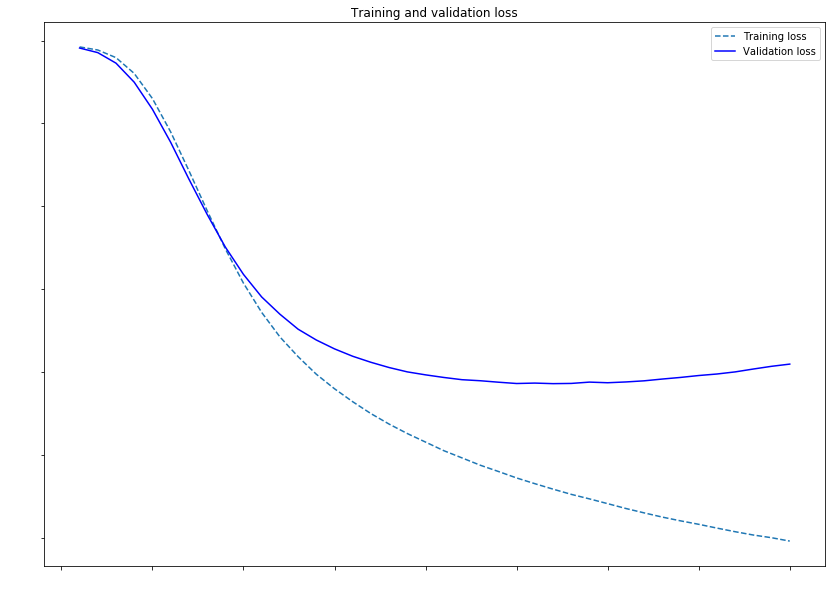

In [99]:
import matplotlib.pyplot as plt

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)


plt.figure(figsize=(14, 10))
plt.plot(epochs, loss, "--", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs", color = "white")
plt.ylabel("Loss", color = "white")
plt.xticks(color = "white")
plt.yticks(color = "white")
plt.legend()

plt.show()

(array([0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 10 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

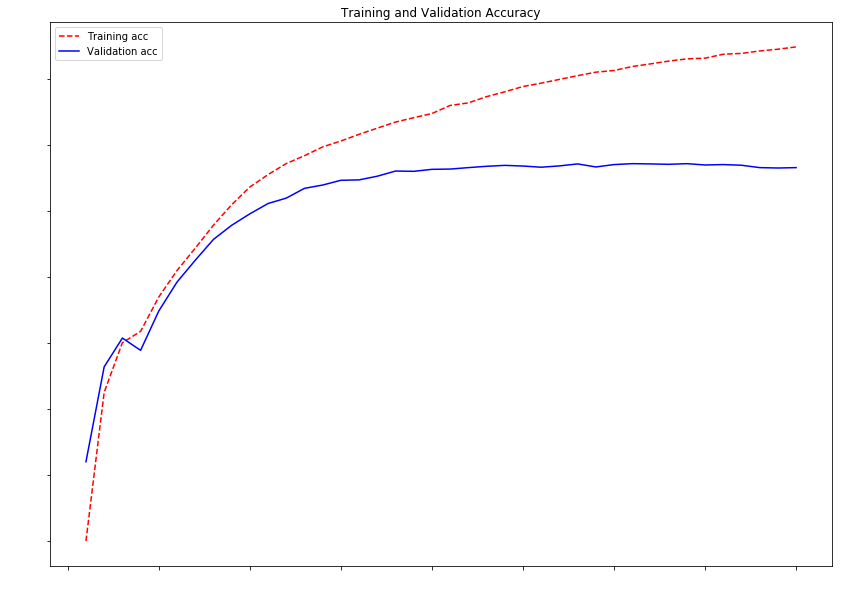

In [105]:
plt.clf()


plt.figure(figsize=(14, 10))
plt.plot(epochs, acc, "r--", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs", color = "white")
plt.ylabel("Accuracy", color = "white")
plt.legend()
plt.xticks(color = "white")
plt.yticks(color = "white")